# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from pylab import rcParams
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, fbeta_score
from sklearn.preprocessing import OneHotEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
import os

# Setting File directory and Importing Dataset

In [2]:
os.chdir("E:\\python")
titanic=pd.read_csv('E:\\python\\train.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Encoding

In [4]:
titanic_enc={"Embarked":{"S":0, "C":1, "Q":2}, "Sex":{"male":0, "female":1}}

In [5]:
titanic.replace(titanic_enc, inplace=True)

In [6]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,0.0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,1.0


In [8]:
titanic= titanic[["PassengerId", "Pclass", "Name", "Sex","Age","SibSp","Parch","Ticket","Fare","Cabin","Embarked","Survived"]]

In [9]:
titanic

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0,1
2,3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0,1
4,5,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,0.0,0
887,888,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,0.0,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,0.0,0
889,890,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,1.0,1


In [10]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    int64  
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    float64
 11  Survived     891 non-null    int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 83.7+ KB


# Summary

In [11]:
titanic.describe(include="object")

,Name,Ticket,Cabin
count,891,891,204
unique,891,681,147
top,"Salonen, Mr. Johan Werner",CA. 2343,B96 B98
freq,1,7,4


In [12]:
titanic.describe(include="int64")

,PassengerId,Pclass,Sex,SibSp,Parch,Survived
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,0.352413,0.523008,0.381594,0.383838
std,257.353842,0.836071,0.477990,1.102743,0.806057,0.486592
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,3.000000,0.000000,0.000000,0.000000,0.000000
75%,668.500000,3.000000,1.000000,1.000000,0.000000,1.000000
max,891.000000,3.000000,1.000000,8.000000,6.000000,1.000000


# Splitting the Target variable

In [13]:
titanic_new=titanic.drop(["Survived"], axis=1)

In [14]:
titanic_new

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0
4,5,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,0.0
887,888,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,0.0
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,0.0
889,890,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,1.0


In [15]:
titanic_tar=titanic["Survived"]
titanic_tar

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# Splitting the Numerical and Categorical columns seperately

In [16]:
cat_col= [col for col in titanic_new.columns.values if titanic_new[col].dtype=="object"]
titanic_new_cat=titanic_new[cat_col]
titanic_new_num=titanic_new.drop(cat_col,axis=1)

In [17]:
titanic_new_cat

,Name,Ticket,Cabin
0,"Braund, Mr. Owen Harris",A/5 21171,NaN
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,C85
2,"Heikkinen, Miss. Laina",STON/O2. 3101282,NaN
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803,C123
4,"Allen, Mr. William Henry",373450,NaN
...,...,...,...
886,"Montvila, Rev. Juozas",211536,NaN
887,"Graham, Miss. Margaret Edith",112053,B42
888,"Johnston, Miss. Catherine Helen ""Carrie""",W./C. 6607,NaN
889,"Behr, Mr. Karl Howell",111369,C148


In [18]:
titanic_new_num

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,0,22.0,1,0,7.2500,0.0
1,2,1,1,38.0,1,0,71.2833,1.0
2,3,3,1,26.0,0,0,7.9250,0.0
3,4,1,1,35.0,1,0,53.1000,0.0
4,5,3,0,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...
886,887,2,0,27.0,0,0,13.0000,0.0
887,888,1,1,19.0,0,0,30.0000,0.0
888,889,3,1,NaN,1,2,23.4500,0.0
889,890,1,0,26.0,0,0,30.0000,1.0


# Finding Missing values

In [20]:
titanic_new.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

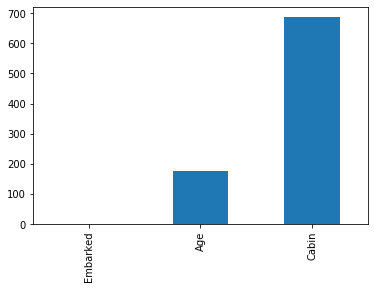

In [21]:
titanic_new_miss=titanic_new.isna().sum()
titanic_new_miss=titanic_new_miss[titanic_new_miss>0]
titanic_new_miss=titanic_new_miss.sort_values(inplace=False)
titanic_new_miss.plot.bar()

# Obtaining Total num of missing values and their percentage# 

In [22]:
total_miss = titanic_new.isnull().sum().sort_values(ascending=False)
percent_miss = (titanic_new.isnull().sum()/titanic_new.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_miss, percent_miss], axis=1, keys=['Total', 'Percent'])
missing_data.head(15)

,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
Fare,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


# Missing value Treatment

# 1. Misssing value imputation in Numerical columns: (Imputing Median value)

In [23]:
data_len = titanic_new_num.shape[0]

for col in titanic_new_num.columns.values:
    missing_values = titanic_new_num[col].isnull().sum()
    if missing_values > 180:
        titanic_new_num1 = titanic_new_num.drop(col, axis = 1)
    else:
        titanic_new_num1 = titanic_new_num.fillna(titanic_new_num[col].median())

In [24]:
titanic_new_num1

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,0,22.0,1,0,7.2500,0.0
1,2,1,1,38.0,1,0,71.2833,1.0
2,3,3,1,26.0,0,0,7.9250,0.0
3,4,1,1,35.0,1,0,53.1000,0.0
4,5,3,0,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...
886,887,2,0,27.0,0,0,13.0000,0.0
887,888,1,1,19.0,0,0,30.0000,0.0
888,889,3,1,0.0,1,2,23.4500,0.0
889,890,1,0,26.0,0,0,30.0000,1.0


In [25]:
titanic_new_num1.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

# 2.Misssing value imputation in Categorical columns (Imputing Dummy values)

In [26]:
data_len = titanic_new_cat.shape[0]

for col in titanic_new_cat.columns.values:
    missing_values = titanic_new_cat[col].isnull().sum()
    if missing_values > 50:
        print("droping column: {}".format(col))
        titanic_new_cat1=titanic_new_cat.drop(col, axis = 1)
    else:
        pass

droping column: Cabin


In [27]:
titanic_new_cat1

,Name,Ticket
0,"Braund, Mr. Owen Harris",A/5 21171
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599
2,"Heikkinen, Miss. Laina",STON/O2. 3101282
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803
4,"Allen, Mr. William Henry",373450
...,...,...
886,"Montvila, Rev. Juozas",211536
887,"Graham, Miss. Margaret Edith",112053
888,"Johnston, Miss. Catherine Helen ""Carrie""",W./C. 6607
889,"Behr, Mr. Karl Howell",111369


# Skew Correction

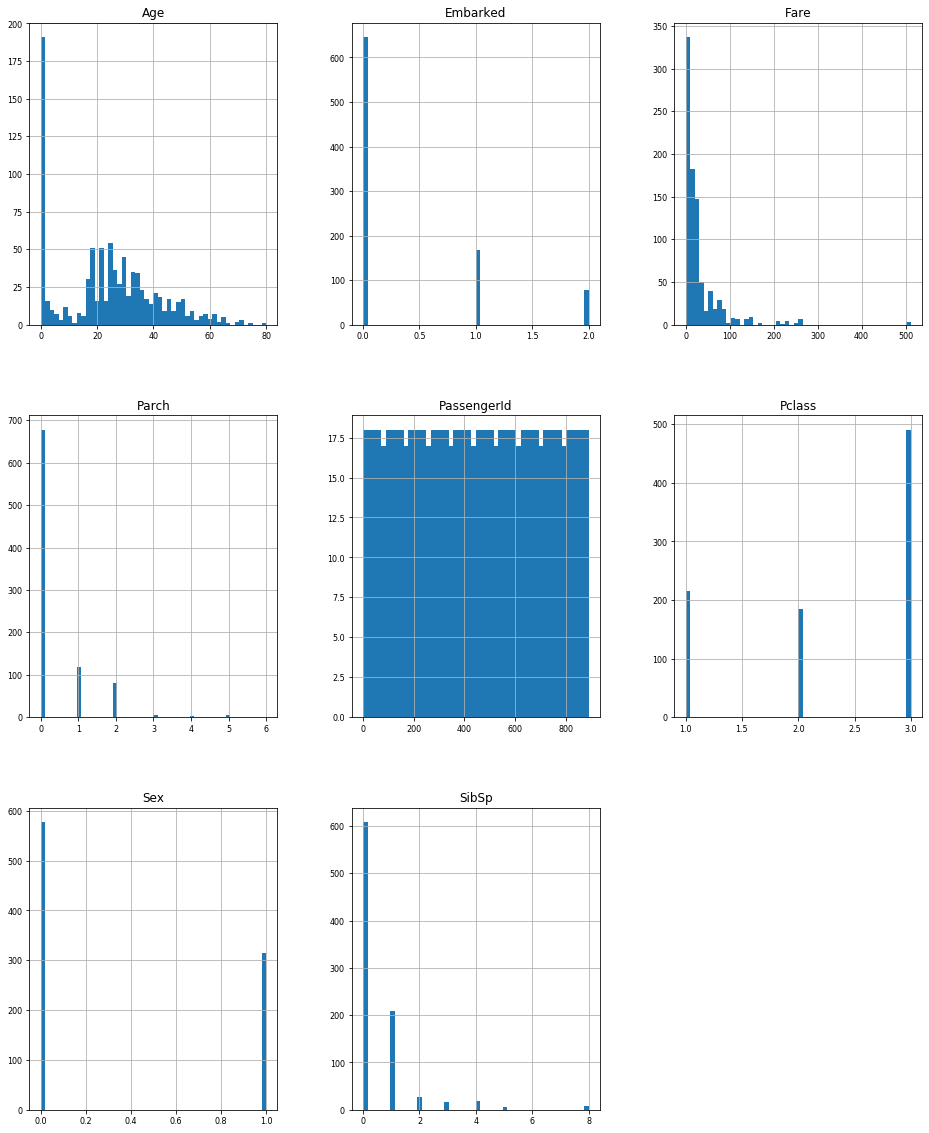

In [28]:
titanic_new_num1.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [29]:
titanic_new_num1.skew()

PassengerId    0.000000
Pclass        -0.630548
Sex            0.618921
Age            0.262862
SibSp          3.695352
Parch          2.749117
Fare           4.787317
Embarked       1.543397
dtype: float64

# Log Transformation

In [30]:
titanic_new_num1["Fare"]=np.log1p(titanic_new_num1["Fare"])

In [31]:
titanic_new_num1["Fare"].skew()

0.3949280095189306

In [32]:
titanic_new_num1.skew()

PassengerId    0.000000
Pclass        -0.630548
Sex            0.618921
Age            0.262862
SibSp          3.695352
Parch          2.749117
Fare           0.394928
Embarked       1.543397
dtype: float64

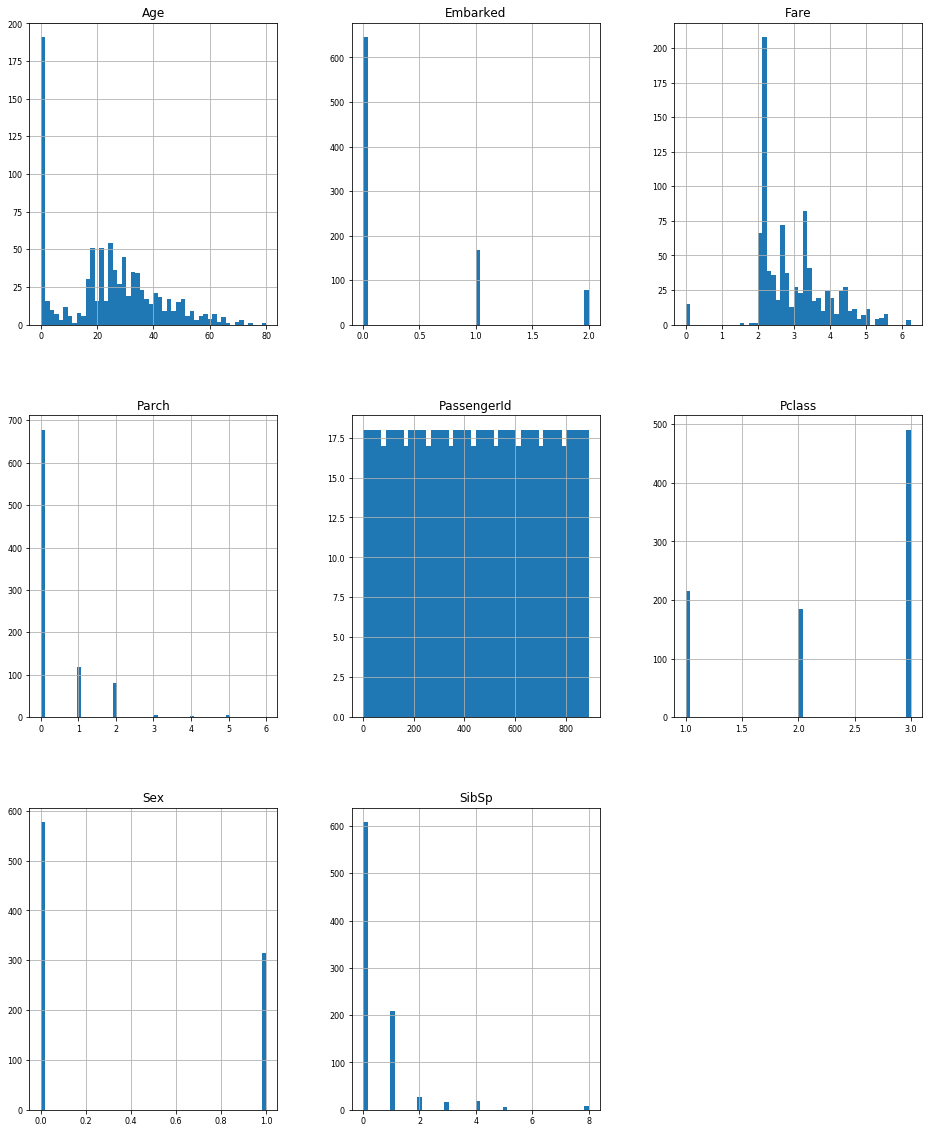

In [33]:
titanic_new_num1.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

# Mean Normalization of Numerical variable

In [34]:
titanic_new_num1_norm=((titanic_new_num1-titanic_new_num1.mean())/(titanic_new_num1.max()-titanic_new_num1.min()))

In [35]:
titanic_new_num1_norm

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,-0.500000,0.345679,-0.352413,-0.022491,0.059624,-0.063599,-0.136524,-0.180696
1,-0.498876,-0.654321,0.647587,0.177509,0.059624,-0.063599,0.211243,0.319304
2,-0.497753,0.345679,0.647587,0.027509,-0.065376,-0.063599,-0.123922,-0.180696
3,-0.496629,-0.654321,0.647587,0.140009,0.059624,-0.063599,0.164814,-0.180696
4,-0.495506,0.345679,-0.352413,0.140009,-0.065376,-0.063599,-0.121694,-0.180696
...,...,...,...,...,...,...,...,...
886,0.495506,-0.154321,-0.352413,0.040009,-0.065376,-0.063599,-0.051785,-0.180696
887,0.496629,-0.654321,0.647587,-0.059991,-0.065376,-0.063599,0.075588,-0.180696
888,0.497753,0.345679,0.647587,-0.297491,0.059624,0.269734,0.037556,-0.180696
889,0.498876,-0.654321,-0.352413,0.027509,-0.065376,-0.063599,0.075588,0.319304


# Finalized dataset


In [37]:
titanic_new1=pd.concat([titanic_new_num1_norm,titanic_new_cat1], axis=1)

In [38]:
titanic_new1

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name,Ticket
0,-0.500000,0.345679,-0.352413,-0.022491,0.059624,-0.063599,-0.136524,-0.180696,"Braund, Mr. Owen Harris",A/5 21171
1,-0.498876,-0.654321,0.647587,0.177509,0.059624,-0.063599,0.211243,0.319304,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599
2,-0.497753,0.345679,0.647587,0.027509,-0.065376,-0.063599,-0.123922,-0.180696,"Heikkinen, Miss. Laina",STON/O2. 3101282
3,-0.496629,-0.654321,0.647587,0.140009,0.059624,-0.063599,0.164814,-0.180696,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803
4,-0.495506,0.345679,-0.352413,0.140009,-0.065376,-0.063599,-0.121694,-0.180696,"Allen, Mr. William Henry",373450
...,...,...,...,...,...,...,...,...,...,...
886,0.495506,-0.154321,-0.352413,0.040009,-0.065376,-0.063599,-0.051785,-0.180696,"Montvila, Rev. Juozas",211536
887,0.496629,-0.654321,0.647587,-0.059991,-0.065376,-0.063599,0.075588,-0.180696,"Graham, Miss. Margaret Edith",112053
888,0.497753,0.345679,0.647587,-0.297491,0.059624,0.269734,0.037556,-0.180696,"Johnston, Miss. Catherine Helen ""Carrie""",W./C. 6607
889,0.498876,-0.654321,-0.352413,0.027509,-0.065376,-0.063599,0.075588,0.319304,"Behr, Mr. Karl Howell",111369


# Exploratory Data Analysis


# a. Factor Plot

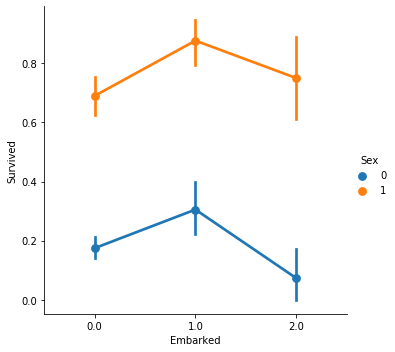

In [43]:
sns.factorplot("Embarked","Survived", data=titanic , hue="Sex")

# b. Bar Plot

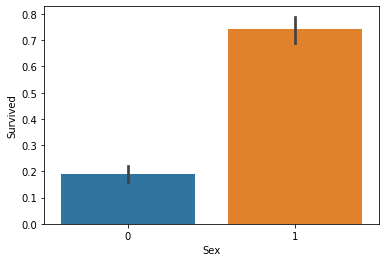

In [40]:
sns.barplot(titanic.Sex,titanic.Survived)

# Correlation between Independent variables

In [41]:
titanic_new_num1_norm.corr()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.035144,-0.042939,0.038125,-0.057527,-0.001652,-0.007425,-0.030467
Pclass,-0.035144,1.000000,-0.131900,-0.361353,0.083081,0.018443,-0.661022,0.045702
Sex,-0.042939,-0.131900,1.000000,-0.024978,0.114631,0.245489,0.263276,0.116569
Age,0.038125,-0.361353,-0.024978,1.000000,-0.184664,-0.048786,0.187186,-0.209388
SibSp,-0.057527,0.083081,0.114631,-0.184664,1.000000,0.414838,0.318528,-0.059961
Parch,-0.001652,0.018443,0.245489,-0.048786,0.414838,1.000000,0.332186,-0.078665
Fare,-0.007425,-0.661022,0.263276,0.187186,0.318528,0.332186,1.000000,0.019588
Embarked,-0.030467,0.045702,0.116569,-0.209388,-0.059961,-0.078665,0.019588,1.000000


# Correlation Plot

Text(0.5, 1, 'Correlation between features')

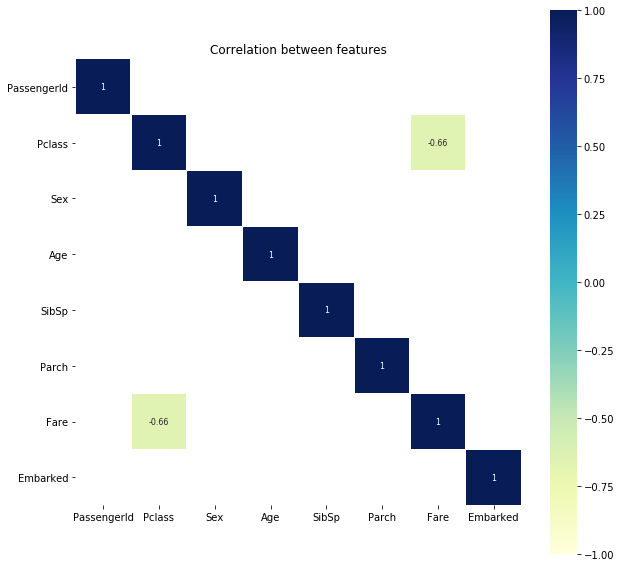

In [44]:
corr=titanic_new_num1_norm.corr()
plt.figure(figsize=(10, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)], 
            cmap='YlGnBu', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);
plt.title('Correlation between features')

# Scatter Plot

No handles with labels found to put in legend.


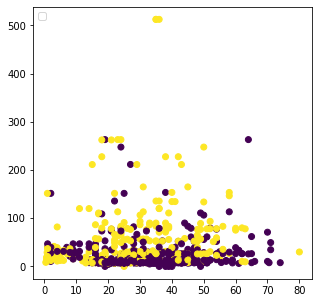

In [66]:
rcParams['figure.figsize']=5,5
plt.scatter(titanic['Age'],titanic['Fare'],c=titanic['Survived'])
plt.legend(loc='upper left')
plt.show()

# Violin Plot

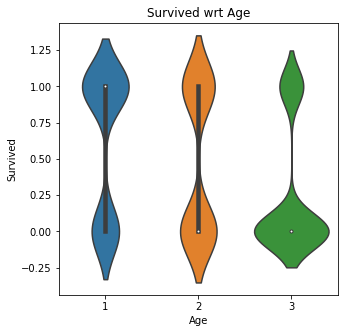

In [74]:
sns.violinplot(titanic.Pclass,titanic["Survived"])
plt.title("Survived wrt Pclass")
plt.xlabel("Pclass")
plt.ylabel("Survived");

 # Splitting Train and Test

In [45]:
X_train,X_test,y_train,y_test=train_test_split(titanic_new_num1_norm,titanic_tar,test_size=0.25,random_state=42)
print("X_train ",X_train.shape)
print("X_test ",X_test.shape)
print("y_train ",y_train.shape)
print("y_test ",y_test.shape)

X_train  (668, 8)
X_test  (223, 8)
y_train  (668,)
y_test  (223,)


In [46]:
seed=7

#prepare models
models=[]
models.append(('LR', LogisticRegression()))
models.append(('LDA' ,LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGB', XGBClassifier()))

In [47]:
import warnings
warnings.filterwarnings('ignore')
#evaluate each model in turn
results=[]
names=[]
scoring='recall'
#scoring='precision'

seed=7
for name, model in models:
    kfold=KFold(n_splits=5, random_state=seed)
    cv_results=cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg=(name, cv_results.mean(), cv_results.std())
    print(msg)

('LR', 0.6752185315943358, 0.08782758704527895)
('LDA', 0.6708707055073793, 0.08832129688529428)
('KNN', 0.6296389044802326, 0.0897716614514933)
('CART', 0.6627071702098688, 0.09271466811733212)
('NB', 0.750180634480967, 0.056064569245451355)
('RF', 0.6677513186217474, 0.06600837391744865)
('SVM', 0.6687865506301671, 0.08970657937416698)
('XGB', 0.6529331136891259, 0.09076415530344886)


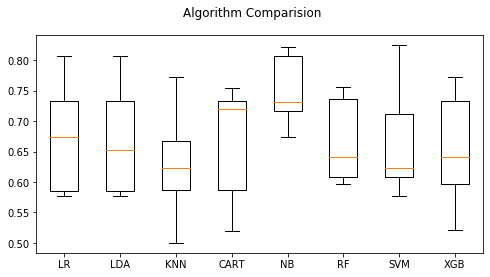

In [48]:
fig=plt.figure(figsize=(8,4))
fig.suptitle('Algorithm Comparision')
ax=fig.add_subplot(111)
plt.boxplot(results  )
ax.set_xticklabels(names)
plt.show()


# Model Building

# Logistic Regression


In [49]:
model=LogisticRegression()

model.fit(X_train,y_train)

#predictions
y_pred=model.predict(X_test)


In [50]:
print(accuracy_score(y_test,y_pred))
print('')
print(classification_report(y_test, y_pred))
print('')

0.7757847533632287

              precision    recall  f1-score   support

           0       0.80      0.83      0.82       134
           1       0.73      0.70      0.71        89

    accuracy                           0.78       223
   macro avg       0.77      0.76      0.76       223
weighted avg       0.77      0.78      0.77       223




# Decision Tree

In [51]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [52]:
print(accuracy_score(y_test,y_pred))
print('')
print(classification_report(y_test, y_pred))
print('')

0.7713004484304933

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       134
           1       0.72      0.71      0.71        89

    accuracy                           0.77       223
   macro avg       0.76      0.76      0.76       223
weighted avg       0.77      0.77      0.77       223




# Random Forest

In [53]:
model=RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [54]:
print(accuracy_score(y_test,y_pred))
print('')
print(classification_report(y_test, y_pred))
print('')

0.8161434977578476

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       134
           1       0.79      0.73      0.76        89

    accuracy                           0.82       223
   macro avg       0.81      0.80      0.81       223
weighted avg       0.81      0.82      0.81       223




# SVM

In [55]:
model=SVC(gamma='auto')
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [56]:
print(accuracy_score(y_test,y_pred))
print('')
print(classification_report(y_test, y_pred))
print('')

0.7847533632286996

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       134
           1       0.74      0.71      0.72        89

    accuracy                           0.78       223
   macro avg       0.78      0.77      0.77       223
weighted avg       0.78      0.78      0.78       223




# XG-Boost

In [57]:
model=XGBClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [58]:
print(accuracy_score(y_test,y_pred))
print('')
print(classification_report(y_test, y_pred))
print('')

0.8071748878923767

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       134
           1       0.79      0.71      0.75        89

    accuracy                           0.81       223
   macro avg       0.80      0.79      0.80       223
weighted avg       0.81      0.81      0.81       223




# LDA

In [59]:
model=LinearDiscriminantAnalysis()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [60]:
print(accuracy_score(y_test,y_pred))
print('')
print(classification_report(y_test, y_pred))
print('')

0.7668161434977578

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       134
           1       0.71      0.70      0.70        89

    accuracy                           0.77       223
   macro avg       0.76      0.76      0.76       223
weighted avg       0.77      0.77      0.77       223




# Naive Bayes

In [61]:
model=GaussianNB()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [62]:
print(accuracy_score(y_test,y_pred))
print('')
print(classification_report(y_test, y_pred))
print('')

0.7892376681614349

              precision    recall  f1-score   support

           0       0.89      0.74      0.81       134
           1       0.69      0.87      0.77        89

    accuracy                           0.79       223
   macro avg       0.79      0.80      0.79       223
weighted avg       0.81      0.79      0.79       223


